In [1]:
using Plots
using Random
using LaTeXStrings

rng = Xoshiro(14588); # set random number generator seed

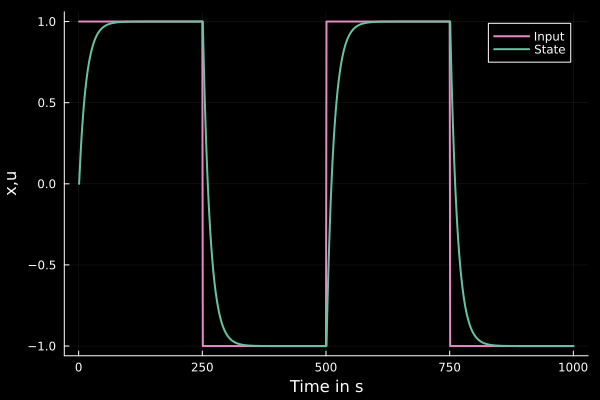

In [11]:
Δt = 1; # time step width in s
Vs = 1; # Steady-state gain
τ = 15; # Time constant in s

a = (1-Δt/τ);
b = (Vs*Δt/τ);

# Generate input signal as multiple step functions towards +1 and -1 without a loop
N = 1000; # number of samples
u = zeros(N);
u[1:250] .= 1;
u[251:500] .= -1;
u[501:750] .= 1;
u[751:1000] .= -1;

# Generate output signal
x = zeros(N);
x[1] = 0;
for k = 2:N
    x[k] = a*x[k-1] + b*u[k-1];
end

# Plot input and output signal
plot(u, label="Input", lw=2,
background_color="#000000", grid=true, palette = :Set2_5, linecolor=4)
plot!(x, label="State", lw=2, linecolor=1)
xlabel!("Time in s")
ylabel!("x,u")

In [3]:
#set up an OLS problem to identify the parameters of the model
Y = x[2:end];
Z = [x[1:end-1] u[1:end-1]];
w = inv(Z'*Z)*Z'*Y;

In [4]:
# Generate predicted output signal
x_hat = zeros(N);
x_hat[1] = 0;
for k = 2:N
    x_hat[k] = w[1]*x_hat[k-1] + w[2]*u[k-1];
end


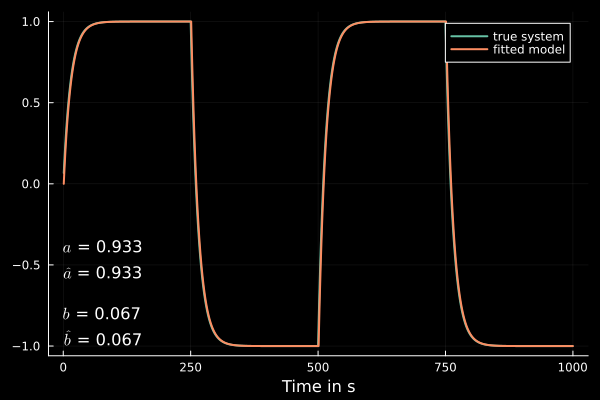

In [13]:
plot(Y, label="true system", 
lw=2, background_color="#000000",
grid=true, palette = :Set2_5)
plot!(x_hat, label="fitted model", lw=2)
xlabel!("Time in s")

# add annotation box showing estimated parameter values
annotate!([(0, -0.55, text(L"$\hat{a}$ = %$(round(w[1]; digits = 3))", 
           11, :left, :white)),
           (0, -0.95, text(L"$\hat{b}$ = %$(round(w[2]; digits = 3))", 
           11, :left, :white))])

# add annotation box showing true parameter values
annotate!([(0, -0.4, text(L"$a$ = %$(round(a; digits = 3))",
           11, :left, :white)),
           (0, -0.8, text(L"$b$ = %$(round(b; digits = 3))", 
           11, :left, :white))])

In [6]:
#redo the parameter identification with measurement noise on the states
σ = 0.1; # standard deviation of measurement noise
x_noisy = x + σ*randn(N); # add noise to the states

#set up an OLS problem to identify the parameters of the model
Y_noisy = x_noisy[2:end];
Z_noisy = [x_noisy[1:end-1] u[1:end-1]];
w_noisy = inv(Z_noisy'*Z_noisy)*Z_noisy'*Y_noisy

# Generate predicted output signal
x_hat_noisy = zeros(N);
x_hat_noisy[1] = 0;
for k = 2:N
    x_hat_noisy[k] = w_noisy[1]*x_hat_noisy[k-1] + w_noisy[2]*u[k-1];
end


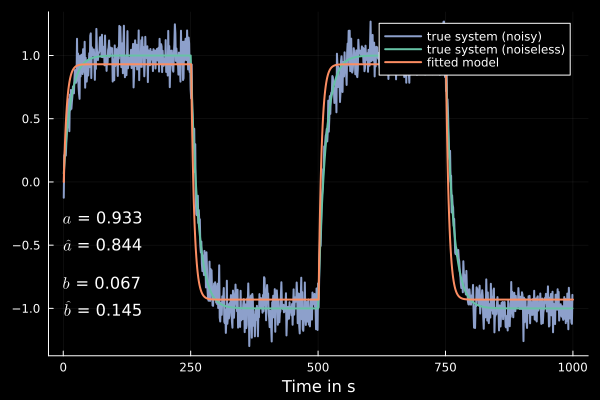

In [14]:
# plot the predicted model output vs. the ground truth data
plot(Y_noisy, label="true system (noisy)",
lw=2, background_color="#000000",
grid=true, palette = :Set2_5, linecolor=3)
plot!(Y, label="true system (noiseless)",
lw=2, linecolor=1)
plot!(x_hat_noisy, label="fitted model", lw=2, linecolor=2)

xlabel!("Time in s")

# add annotation box showing estimated parameter values
annotate!([(0, -0.5, text(L"$\hat{a}$ = %$(round(w_noisy[1]; digits = 3))", 
           11, :left, :white)),
           (0, -1.0, text(L"$\hat{b}$ = %$(round(w_noisy[2]; digits = 3))", 
           11, :left, :white))])

# add annotation box showing true parameter values
annotate!([(0, -0.3, text(L"$a$ = %$(round(a; digits = 3))",
           11, :left, :white)),
           (0, -0.8, text(L"$b$ = %$(round(b; digits = 3))", 
           11, :left, :white))])